**Import library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

**Preprocessing and Visualization**

In [3]:
data = pd.read_csv("../../Data/adult.csv")
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


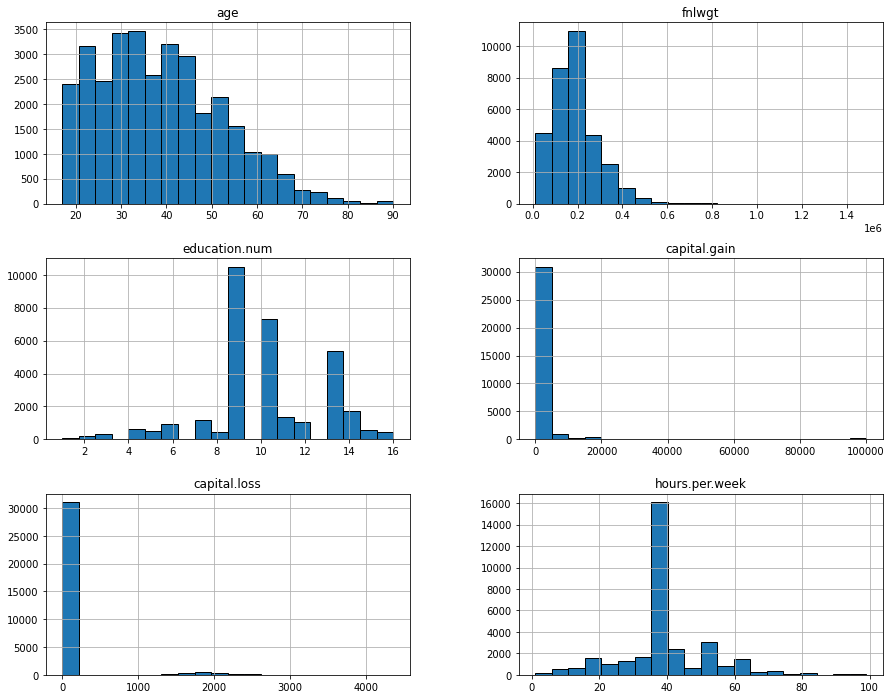

In [5]:
data.hist(bins=20, figsize=(15,12), edgecolor='black',grid=True)
plt.show()

In [6]:
data.loc[data['native.country']=="?"]

age         workclass  fnlwgt     education  education.num  \
9       41           Private   70037  Some-college             10   
18      22           Private  119592    Assoc-acdm             12   
65      60      Self-emp-inc  226355     Assoc-voc             11   
86      39  Self-emp-not-inc  218490   Prof-school             15   
87      43       Federal-gov  156996   Prof-school             15   
...    ...               ...     ...           ...            ...   
32459   44      Self-emp-inc   71556       Masters             14   
32476   58      Self-emp-inc  181974     Doctorate             16   
32498   42  Self-emp-not-inc  217597       HS-grad              9   
32515   39           Private  107302       HS-grad              9   
32528   81                 ?  120478     Assoc-voc             11   

           marital.status         occupation   relationship  \
9           Never-married       Craft-repair      Unmarried   
18          Never-married  Handlers-cleaners  Not-in-family   
65     Married-civ-spouse  Machine-op-inspct        Husband   
86     Married-civ-spouse     Prof-specialty        Husband   
87     Married-civ-spouse     Prof-specialty        Husband   
...                   ...                ...            ...   
32459  Married-civ-spouse              Sales        Husband   
32476       Never-married     Prof-specialty  Not-in-family   
32498            Divorced              Sales      Own-child   
32515  Married-civ-spouse     Prof-specialty        Husband   
32528            Divorced                  ?      Unmarried   

                     race     sex  capital.gain  capital.loss  hours.per.week  \
9                   White    Male             0          3004              60   
18                  Black    Male             0          2824              40   
65                  White    Male             0          2415              70   
86                  White    Male             0          2415              50   
87     Asian-Pac-Islander    Male             0          2415              55   
...                   ...     ...           ...           ...             ...   
32459               White    Male             0             0              50   
32476               White  Female             0             0              99   
32498               White    Male             0             0              50   
32515               White    Male             0             0              45   
32528               White  Female             0             0               1   

      native.country income  
9                  ?   >50K  
18                 ?   >50K  
65                 ?   >50K  
86                 ?   >50K  
87                 ?   >50K  
...              ...    ...  
32459              ?   >50K  
32476              ?  <=50K  
32498              ?  <=50K  
32515              ?   >50K  
32528              ?  <=50K  

[583 rows x 15 columns]

In [7]:
data.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
data = data.replace('?', np.NAN)

In [9]:
for col in ['workclass', 'occupation', 'native.country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [10]:
data.isnull().values.any()

False

In [11]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
data['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Text(0.5, 1.0, 'Income Values')

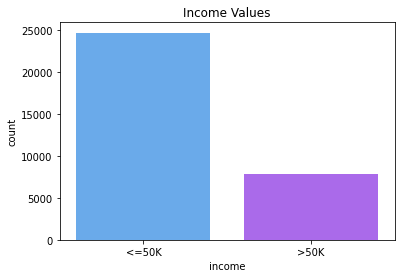

In [13]:
import seaborn as sns
sns.countplot(x='income',data=data, palette="cool")
plt.title('Income Values')

Text(0.5, 1.0, 'Age vs Income')

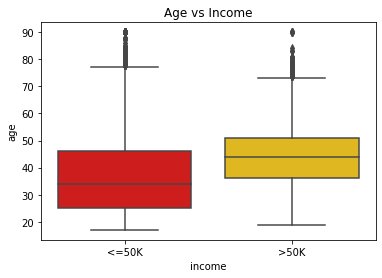

In [14]:
sns.boxplot(x='income', y='age', data=data, palette='hot')
plt.title('Age vs Income')

Text(0.5, 1.0, 'hours vs Income')

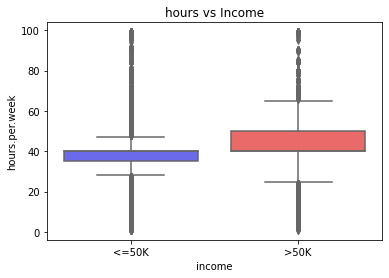

In [15]:
sns.boxplot(x='income',y='hours.per.week', data=data, palette='seismic')
plt.title('hours vs Income')

Text(0.5, 1.0, 'Sex vs Income')

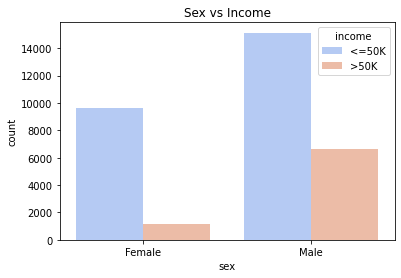

In [16]:
sns.countplot(data['sex'],hue=data['income'], palette='coolwarm')
plt.title('Sex vs Income')

Text(0.5, 1.0, 'Occupation vs Income')

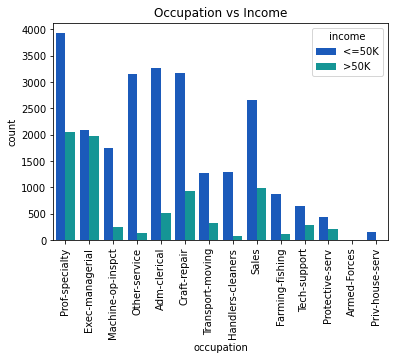

In [17]:
sns.countplot(data['occupation'],hue=data['income'], palette='winter')
plt.xticks(rotation=90)
plt.title('Occupation vs Income')

In [18]:
data['income']=data['income'].map({'<=50K':0, '>50K': 1})

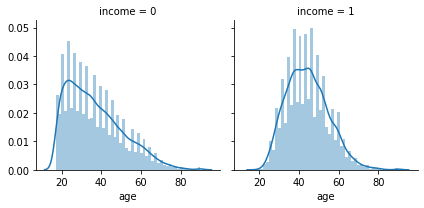

In [19]:
sns.FacetGrid(data, col='income').map(sns.distplot, "age")

Text(0.5, 1.0, 'Education vs Income')

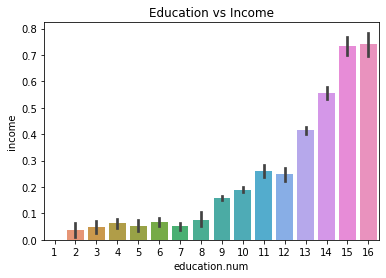

In [20]:
sns.barplot(x='education.num', y='income', data=data)
plt.title('Education vs Income')

Text(0.5, 1.0, 'Workclass vs Income')

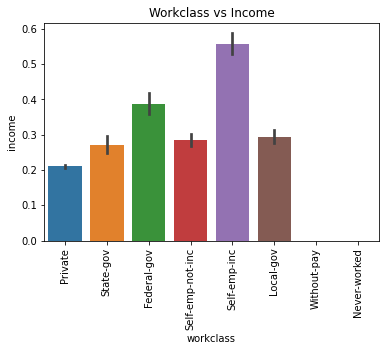

In [21]:
sns.barplot(x="workclass",y="income",data=data)
plt.xticks(rotation=90)
plt.title('Workclass vs Income')

Text(0.5, 1.0, 'Education vs Income')

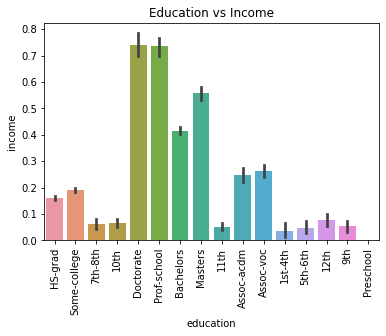

In [22]:
sns.barplot(x="education",y="income",data=data)
plt.xticks(rotation=90)
plt.title('Education vs Income')


Text(0.5, 1.0, 'Education vs Income')

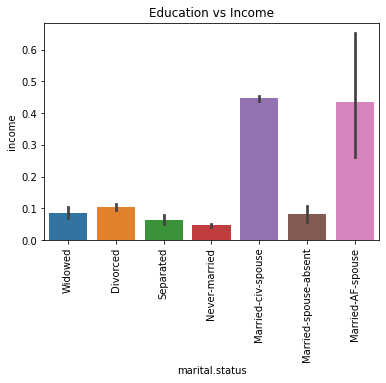

In [23]:
sns.barplot(x='marital.status',y='income', data=data)
plt.xticks(rotation=90)
plt.title('Education vs Income')

In [24]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

Text(0.5, 1.0, 'Relationship vs Income')

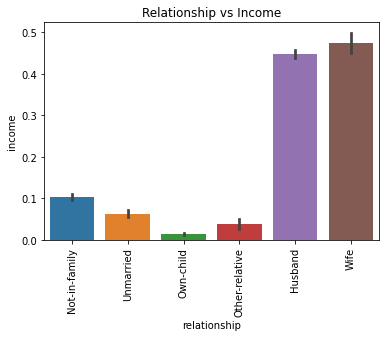

In [25]:
sns.barplot(x='relationship',y='income', data=data)
plt.xticks(rotation=90)
plt.title('Relationship vs Income')

Text(0.5, 1.0, 'Race vs Income')

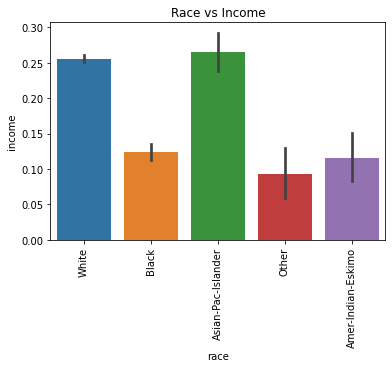

In [26]:
sns.barplot(x='race', y='income', data=data)
plt.xticks(rotation=90)
plt.title('Race vs Income')

**Label Encoder**

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [28]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = label_encoder.fit_transform(data[col])

In [29]:
data.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int64
dtype: object

In [30]:
data.head()

age  workclass  fnlwgt  education  education.num  marital.status  \
0   90          3   77053         11              9               6   
1   82          3  132870         11              9               6   
2   66          3  186061         15             10               6   
3   54          3  140359          5              4               0   
4   41          3  264663         15             10               5   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0          4356   
1           3             1     4    0             0          4356   
2           9             4     2    0             0          4356   
3           6             4     4    0             0          3900   
4           9             3     4    0             0          3900   

   hours.per.week  native.country  income  
0              40              38       0  
1              18              38       0  
2              40              38       0  
3              40              38       0  
4              40              38       0

<AxesSubplot:>

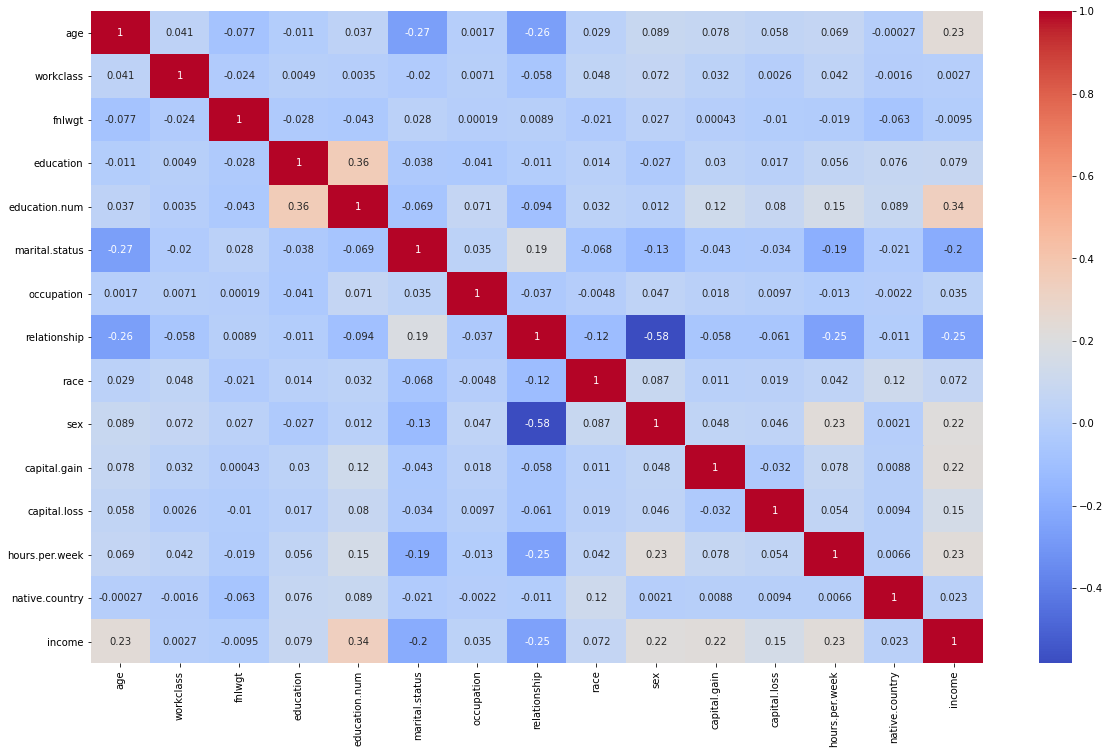

In [31]:
corr = data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [32]:
corr['income'].sort_values(ascending = False)

income            1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
education         0.079317
race              0.071846
occupation        0.034625
native.country    0.023058
workclass         0.002693
fnlwgt           -0.009463
marital.status   -0.199307
relationship     -0.250918
Name: income, dtype: float64

#**Divisão do dataset**

In [33]:
previsores = data.iloc[:,0:14]
classe = data.iloc[:,14]

**#Scaler**

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
previsores = scaler.fit_transform(previsores)

**#One Hot Encoder**

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_tranformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(),
 [1, 3, 5, 6, 7, 8, 9, 13])],remainder='passthrough')

previsores = column_tranformer.fit_transform(previsores).toarray()


In [37]:
previsores

array([[ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        10.59350656, -0.03542945],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        10.59350656, -1.81720429],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        10.59350656, -0.03542945],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        -0.21665953, -0.03542945],
       [ 0.        ,  0.        ,  0.        , ..., -0.14592048,
        -0.21665953, -1.65522476]])

**#Data split for Train and test**

In [ ]:
from sklearn.model_selection import train_test_split
previsores_train, previsores_teste, classe_train, classe_test = train_test_split(previsores, classe, test_size=0.30, random_state=0)

#create List Object

In [ ]:
#append results
lista=[]

**#CREATING MODELS**

**1. Logistic Regression**

In [ ]:
# best parameters for models:
# Labelencoder (79.23%) 
# Labelencoder and Scaler (82.17%)
# Labelencoder, Scaler and OneHotEncoder (84.58%)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

classificador = LogisticRegression(random_state=1, solver='lbfgs')
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('Logistic Regression: ', precisao * 100)
lista.append(precisao)

**2. Naive bayes**

In [ ]:
# best parameters for models:
# Labelencoder (79.50%) 
# Labelencoder and Scaler (80.38%)
# Labelencoder, Scaler and OneHotEncoder (54.50%)

from sklearn.naive_bayes import GaussianNB

classificador = GaussianNB()
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('Naive Bayes: ', precisao * 100)
lista.append(precisao)


**3. Decision Tree**

In [ ]:
# best parameters for models:
# Labelencoder (80.86%) 
# Labelencoder and Scaler (80.84%)
# Labelencoder, Scaler and OneHotEncoder (81.28%)

from sklearn.tree import DecisionTreeClassifier

classificador = DecisionTreeClassifier()
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('Tree Classifier: ', precisao * 100)
lista.append(precisao)


**4. Random Forest**

In [ ]:
# best parameters for models:
# Labelencoder (85.55%) 
# Labelencoder and Scaler (85.51%)
# Labelencoder, Scaler and OneHotEncoder (85.33%)

from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=350, criterion='entropy', random_state=0)
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('Random Forest: ', precisao * 100)
lista.append(precisao)


**5. Gradient Boosting **

In [ ]:
# best parameters for models:
# Labelencoder (86.16%) 
# Labelencoder and Scaler (86.16%)
# Labelencoder, Scaler and OneHotEncoder (86.22%)

from sklearn.ensemble import GradientBoostingClassifier

classificador = GradientBoostingClassifier()
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('GBC: ', precisao * 100)
lista.append(precisao)

6. SVM

In [ ]:
# best parameters for models:
# Labelencoder (75.82%) 
# Labelencoder and Scaler (84.46%)
# Labelencoder, Scaler and OneHotEncoder (84.68%)

from sklearn.svm import SVC

classificador = SVC(kernel = 'rbf', random_state = 1, C = 2.0, gamma='auto')
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('SVM: ', precisao * 100)
lista.append(precisao)

**7. Neural Network - MLP **

In [ ]:
# best parameters for models:
# Labelencoder (80.53%) 
# Labelencoder and Scaler (84.78%)
# Labelencoder, Scaler and OneHotEncoder (83.07%)

from sklearn.neural_network import MLPClassifier

classificador = MLPClassifier(verbose = False,
                              max_iter=1000,
                              tol = 0.0000010,
                              solver = 'adam',
                              hidden_layer_sizes=(100),
                              activation='relu')
classificador.fit(previsores_train, classe_train)

previsoes = classificador.predict(previsores_teste)

precisao = accuracy_score(classe_test, previsoes)
matriz = confusion_matrix(classe_test,previsoes)

print('MLP Classifier: ', precisao * 100)
lista.append(precisao)

**#Result Models**

In [ ]:
fig, ax = plt.subplots()
y_grafico =['Logistic Regression',
          'Naive Bayes',
          'Tree Classifier',
           'Random Forest',
            'GBC',
            'SVM',
            'MLP Classifier'
           ]

x_grafico = lista 
sns.barplot(x=x_grafico,y=y_grafico)
for y,x in enumerate(x_grafico):
    ax.annotate("{:.2f}%".format(x * 100), xy=(x,y))
    ax.set_xlim(0, 1)
plt.xlabel('Accuracy')
plt.title('List Best Models')

*The best parameters for each models can be seen above *

## Fairness

In [39]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [40]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [41]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [42]:
data

age  workclass  fnlwgt  education  education.num  marital.status  \
0       90          3   77053         11              9               6   
1       82          3  132870         11              9               6   
2       66          3  186061         15             10               6   
3       54          3  140359          5              4               0   
4       41          3  264663         15             10               5   
...    ...        ...     ...        ...            ...             ...   
32556   22          3  310152         15             10               4   
32557   27          3  257302          7             12               2   
32558   40          3  154374         11              9               2   
32559   58          3  151910         11              9               6   
32560   22          3  201490         11              9               4   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
0               9             1     4    0             0          4356   
1               3             1     4    0             0          4356   
2               9             4     2    0             0          4356   
3               6             4     4    0             0          3900   
4               9             3     4    0             0          3900   
...           ...           ...   ...  ...           ...           ...   
32556          10             1     4    1             0             0   
32557          12             5     4    0             0             0   
32558           6             0     4    1             0             0   
32559           0             4     4    0             0             0   
32560           0             3     4    1             0             0   

       hours.per.week  native.country  income  
0                  40              38       0  
1                  18              38       0  
2                  40              38       0  
3                  40              38       0  
4                  40              38       0  
...               ...             ...     ...  
32556              40              38       0  
32557              38              38       0  
32558              40              38       1  
32559              40              38       0  
32560              20              38       0  

[32561 rows x 15 columns]

In [44]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(data,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [45]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.196276


In [46]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.ensemble import GradientBoostingClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = GradientBoostingClassifier(n_estimators= 1)

mdl = model.fit(X_train, y_train)
with open('../../Results/GBC/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/GBC/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/GBC/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [47]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = GradientBoostingClassifier(n_estimators= i)
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [48]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/GBC/' + nb_fname + '.csv')
final_result

classifier        T0        T1        T2  \
accuracy                         0.863753  0.757805  0.757805  0.757805   
f1                               0.679200  0.000000  0.000000  0.000000   
statistical_parity_difference   -0.170916  0.000000  0.000000  0.000000   
equal_opportunity_difference    -0.134000  0.000000  0.000000  0.000000   
average_abs_odds_difference      0.095086  0.000000  0.000000  0.000000   
disparate_impact                -1.251047       NaN       NaN       NaN   
theil_index                      0.117975  0.277329  0.277329  0.277329   

                                     T3        T4        T5        T6  \
accuracy                       0.800901  0.800901  0.800901  0.800696   
f1                             0.305605  0.305605  0.305605  0.305387   
statistical_parity_difference -0.037738 -0.037738 -0.037738 -0.037124   
equal_opportunity_difference  -0.013046 -0.013046 -0.013046 -0.013046   
average_abs_odds_difference    0.007014  0.007014  0.007014  0.006668   
disparate_impact              -1.081537 -1.081537 -1.081537 -1.050284   
theil_index                    0.221468  0.221468  0.221468  0.221567   

                                     T7        T8  ...       T90       T91  \
accuracy                       0.812263  0.841744  ...  0.861808  0.862217   
f1                             0.373206  0.576670  ...  0.674228  0.675819   
statistical_parity_difference -0.056003 -0.167438  ... -0.170610 -0.174603   
equal_opportunity_difference  -0.072016 -0.325389  ... -0.137722 -0.153678   
average_abs_odds_difference    0.036707  0.187652  ...  0.097155  0.105922   
disparate_impact              -1.335948 -2.238816  ... -1.252974 -1.289330   
theil_index                    0.206846  0.154330  ...  0.119607  0.118988   

                                    T92       T93       T94       T95  \
accuracy                       0.862422  0.862524  0.862729  0.862831   
f1                             0.675832  0.676151  0.677722  0.677730   
statistical_parity_difference -0.172299 -0.172453 -0.174602 -0.174602   
equal_opportunity_difference  -0.142960 -0.143460 -0.150697 -0.153437   
average_abs_odds_difference    0.100120  0.100370  0.104370  0.105518   
disparate_impact              -1.269788 -1.270428 -1.279351 -1.282658   
theil_index                    0.119075  0.118960  0.118254  0.118298   

                                    T96       T97       T98       T99  
accuracy                       0.862831  0.863138  0.863138  0.863753  
f1                             0.677885  0.678374  0.678374  0.679200  
statistical_parity_difference -0.174448 -0.174448 -0.174909 -0.170916  
equal_opportunity_difference  -0.150697 -0.150697 -0.150697 -0.134000  
average_abs_odds_difference    0.104259  0.104210  0.104494  0.095086  
disparate_impact              -1.278717 -1.282023 -1.287256 -1.251047  
theil_index                    0.118218  0.118111  0.118111  0.117975  

[7 rows x 101 columns]